In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from scipy.ndimage.filters import gaussian_filter
from scipy.optimize import curve_fit

In [38]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p.T, hits.T, ra_bins, dec_bins

In [58]:
def calculate_sflux(bank='A', session='5', doplot=True, sbeam=0.5):
    rc = 335.7
    dc = 63.4
    dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamaps_'+bank+'_'+session+'.npz')
    tmask = dataf['tmask']
    ras = dataf['ras'][tmask]
    decs = dataf['decs'][tmask]
    calibrated = dataf['calibrated'][tmask]
    
    if bank == 'A':
        cfreq = 4.575
    elif bank == 'B':
        cfreq = 5.625
    elif bank == 'C':
        cfreq = 6.125
    elif bank == 'D':
        cfreq = 7.175
    beam = 12.6 / cfreq
    beamarea = ( (beam /60.) * (np.pi / 180.) )**2
    pixarea = ( (sbeam/60.) * (np.pi / 180.) )**2
    
    nrapix = int((ras.max() - ras.min()) / (sbeam / 60.))
    ndecpix = int((decs.max() - decs.min()) / (sbeam / 60.))
    
    datamap, hits, rabins, decbins = naive_map(calibrated, ras, decs, nrapix, ndecpix) 
    mask = hits == 0
    signal = np.zeros_like(datamap)
    signal[~mask] = datamap[~mask] / np.sqrt(hits[~mask])
    
    flux = np.nansum(signal)
    return flux, beamarea, pixarea

In [59]:
sbeams = np.linspace(0.1, 3, 50)

In [60]:
fluxs = []
tbeam = []
pixbeam = []
for sbeam in sbeams:
    flux, a, b = calculate_sflux(sbeam=sbeam, doplot=False)
    fluxs.append(flux)
    tbeam.append(a)
    pixbeam.append(b)
fluxs = np.array(fluxs)
tbeam = np.array(tbeam)
pixbeam = np.array(pixbeam)

In [107]:
bank = 'A'
session = '5'
dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamaps_'+bank+'_'+session+'.npz')
tmask = dataf['tmask']
ras = dataf['ras'][tmask]
decs = dataf['decs'][tmask]
calibrated = dataf['calibrated'][tmask]

In [108]:
ras -= np.mean(ras)
decs -= np.mean(decs)

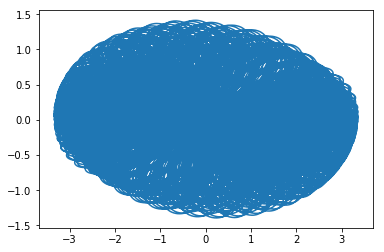

In [109]:
plot(ras, decs)

In [195]:
def gauss(x, y, sigma=1.):
    return (1. / (2. * np.pi * sigma**2)) * np.exp( -(x*x + y*y) / (2. * sigma**2))

In [263]:
tod = gauss(ras, decs, sigma=0.01)

In [264]:
sbeam = 4. 
nrapix = int((ras.max() - ras.min()) / (sbeam / 60.))
ndecpix = int((decs.max() - decs.min()) / (sbeam / 60.))
datamap, hits, rabins, decbins = naive_map(tod, ras, decs, nrapix, ndecpix) 
mask = hits == 0
signal = np.zeros_like(datamap)
signal[~mask] = datamap[~mask] / hits[~mask]

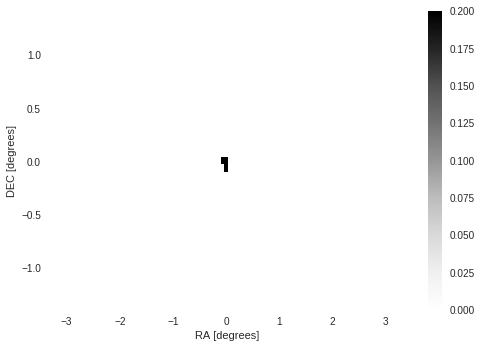

In [265]:
figure()
pc = pcolormesh(rabins, decbins, signal)
clim(0, 0.2)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

In [266]:
float(np.sum(mask)) / signal.size

0.2032520325203252

In [267]:
225 * 0.8

180.0

In [268]:
signal.sum()

365.00838259152511

In [269]:
15 * 15

225

In [245]:
signal.sum()

883.01794808855345

In [246]:
30 * 30 

900

(-3, 3)

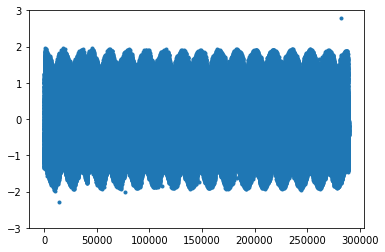

In [234]:
plot(np.diff(ras) * 60 , '.')
ylim(-3, 3)

(-2, 2)

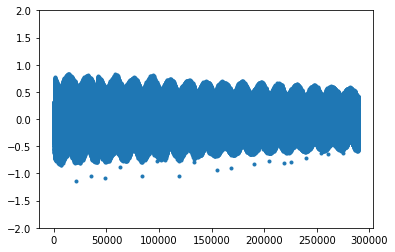

In [233]:
plot(np.diff(decs) * 60 , '.')
ylim(-2, 2)

In [235]:
import seaborn as sns

In [237]:
rdecs = np.diff(decs) * 60
mask = np.abs(rdecs) < 10

In [240]:
rras = np.diff(ras) * 60
mask = np.abs(rras) < 10

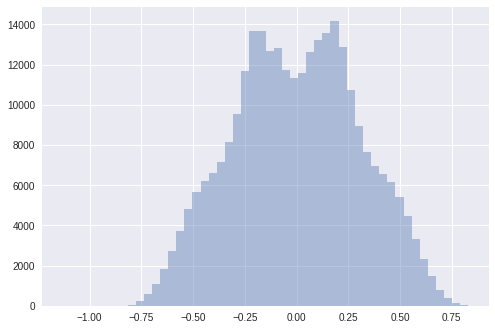

In [239]:
sns.distplot(rdecs[mask], kde=False)

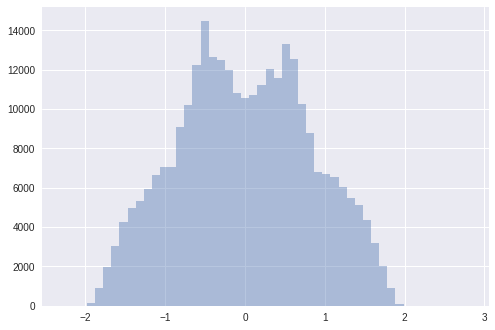

In [241]:
sns.distplot(rras[mask], kde=False)

In [216]:
60 * 60 * 100

360000

In [215]:
signal.sum() 

68593.477133554567

In [203]:
signal.sum() 

3563.0534810841341

In [199]:
signal.sum() 

3874.4548610947413

In [173]:
z.sum()

2990.6088025685735

In [182]:
ras.max(), ras.min()

(3.3629839799044134, -3.3487333049144468)

In [183]:
decs.max(), decs.min()

(1.41402302941394, -1.3930498925823258)

In [256]:
xx, yy = meshgrid(rabins, decbins)

In [257]:
z = gauss(xx, yy)

In [258]:
z.shape

(42, 100)

In [259]:
signal.shape

(41, 99)

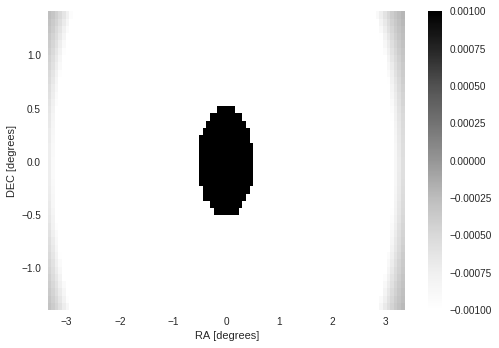

In [260]:
figure()
pc = pcolormesh(rabins, decbins, signal-z[1:,1:])
clim(-0.001, 0.001)
cb = colorbar()
xlabel('RA [degrees]')
ylabel('DEC [degrees]')

In [261]:
z.sum()

182.90318984957096

In [262]:
signal.sum()

217.41478521551551

In [159]:
np.sum(signal)

2752.5086030084613

In [162]:
signal.shape

(167, 401)

In [163]:
signal.size

66967

In [160]:
np.sum(tod)

19392.331570820479

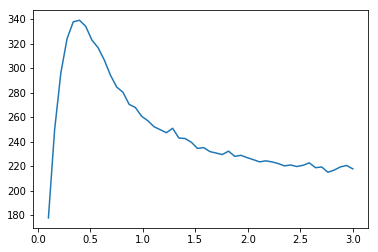

In [105]:
plot(sbeams, fluxs * sbeams)

In [62]:
from scipy.optimize import curve_fit

In [84]:
def plaw(x, a, b):
    return a * x **b

In [101]:
mask = sbeams > 1.

In [102]:
popt = curve_fit(plaw, sbeams[mask], fluxs[mask])

In [103]:
popt[0]

array([ 256.53837813,   -1.17228244])

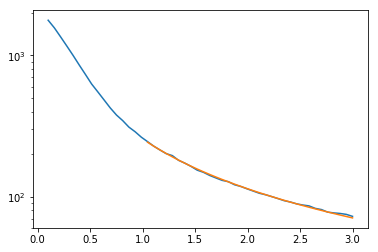

In [106]:
plot(sbeams, fluxs)
plot(sbeams[mask], plaw(sbeams[mask], *popt[0]))
yscale('log')